In [34]:
# Importing Libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Stock Data
data = pd.read_csv('Stock_CSV/AAPL.csv')
# Show the Data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-Jan-21,128.50,129.69,126.86,128.80,125.38,"91,951,100"
1,13-Jan-21,128.76,131.45,128.49,130.89,127.42,"88,636,800"
2,14-Jan-21,130.80,131.00,128.76,128.91,125.49,"90,221,800"
3,15-Jan-21,128.78,130.22,127.00,127.14,123.76,"111,598,500"
4,19-Jan-21,127.78,128.71,126.94,127.83,124.44,"90,757,300"
...,...,...,...,...,...,...,...
1250,05-Jan-26,270.64,271.51,266.14,267.26,267.26,"45,647,200"
1251,06-Jan-26,267.00,267.55,262.12,262.36,262.36,"52,352,100"
1252,07-Jan-26,263.20,263.68,259.81,260.33,260.33,"48,309,800"
1253,08-Jan-26,257.02,259.29,255.70,259.04,259.04,"50,419,300"


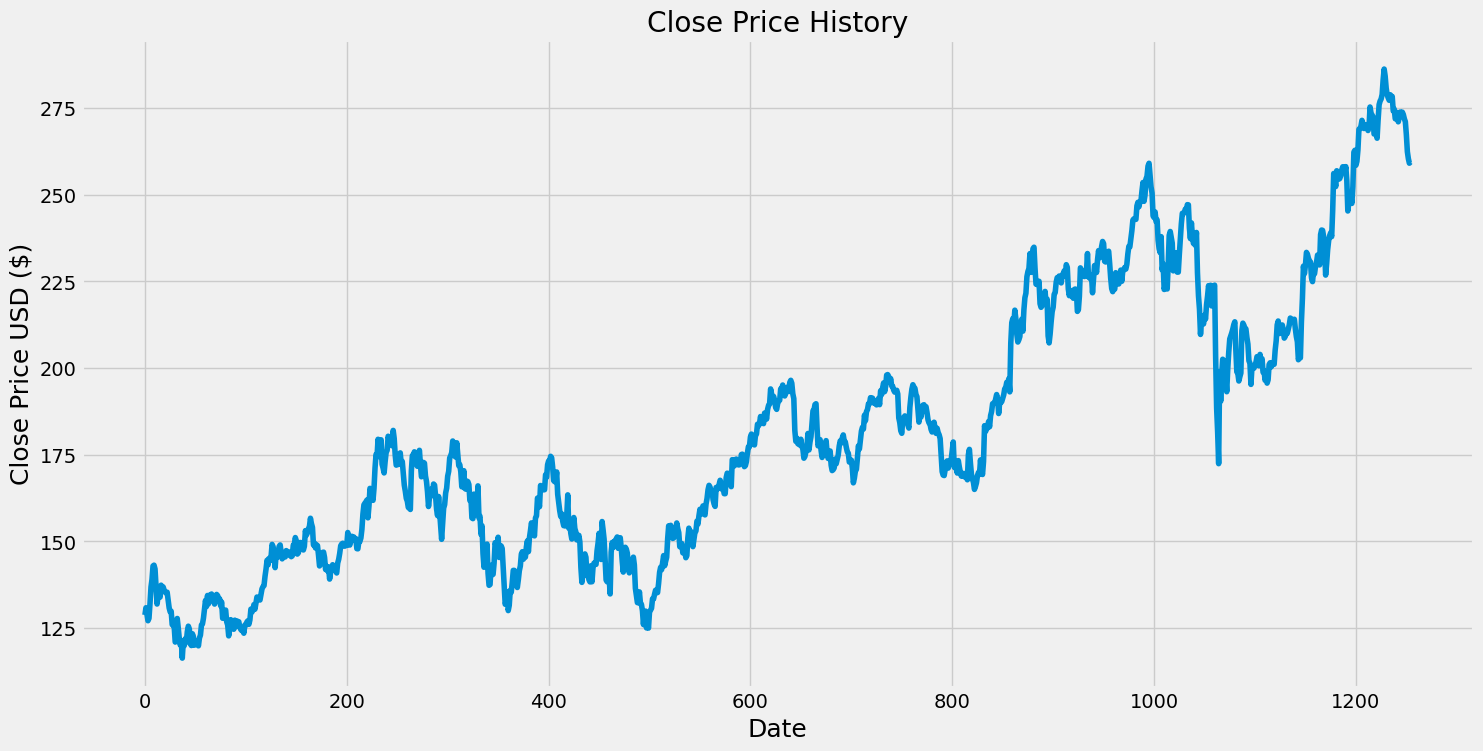

In [ ]:
# Visualizing Closing Price History
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'])
plt.show()

In [37]:
# Get the number of rows to train the model on
training_data_len = math.ceil( len(data) * .8 )

In [38]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1)) #Transforms data from max and min to between 0 and 1

scaled_data

array([[0.06911722],
       [0.08092619],
       [0.06975398],
       ...,
       [0.85030391],
       [0.84283647],
       [0.84474674]], shape=(1255, 1))

In [39]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Loop through the data to create x_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [41]:
# Build the LSTM Model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))   
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') 

C:\Users\lrbac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10) 

Epoch 1/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0026
Epoch 2/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 9.2439e-04
Epoch 3/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 8.6761e-04
Epoch 4/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 6.6004e-04
Epoch 5/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 5.4366e-04
Epoch 6/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 5.7039e-04
Epoch 7/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 4.8508e-04
Epoch 8/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 4.3623e-04
Epoch 9/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 4.5426e-04
Epoch 10/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 4.5738e-04


In [43]:
# Create the training data set
train_data = scaled_data[training_data_len - 60: , : ]

# Create the data sets x_test and y_test
x_test = []
y_test = data[training_data_len :]

for i in range(60, len(train_data)):
    x_test.append(train_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Needs to be 3D for LSTM model

In [44]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Undo scaling

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [45]:
ActualPrices = data[:training_data_len]
PredictedPrices = data[training_data_len:]
PredictedPrices['Predicted Price'] = predictions

C:\Users\lrbac\AppData\Local\Temp\ipykernel_16768\1095800148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PredictedPrices['Predicted Price'] = predictions


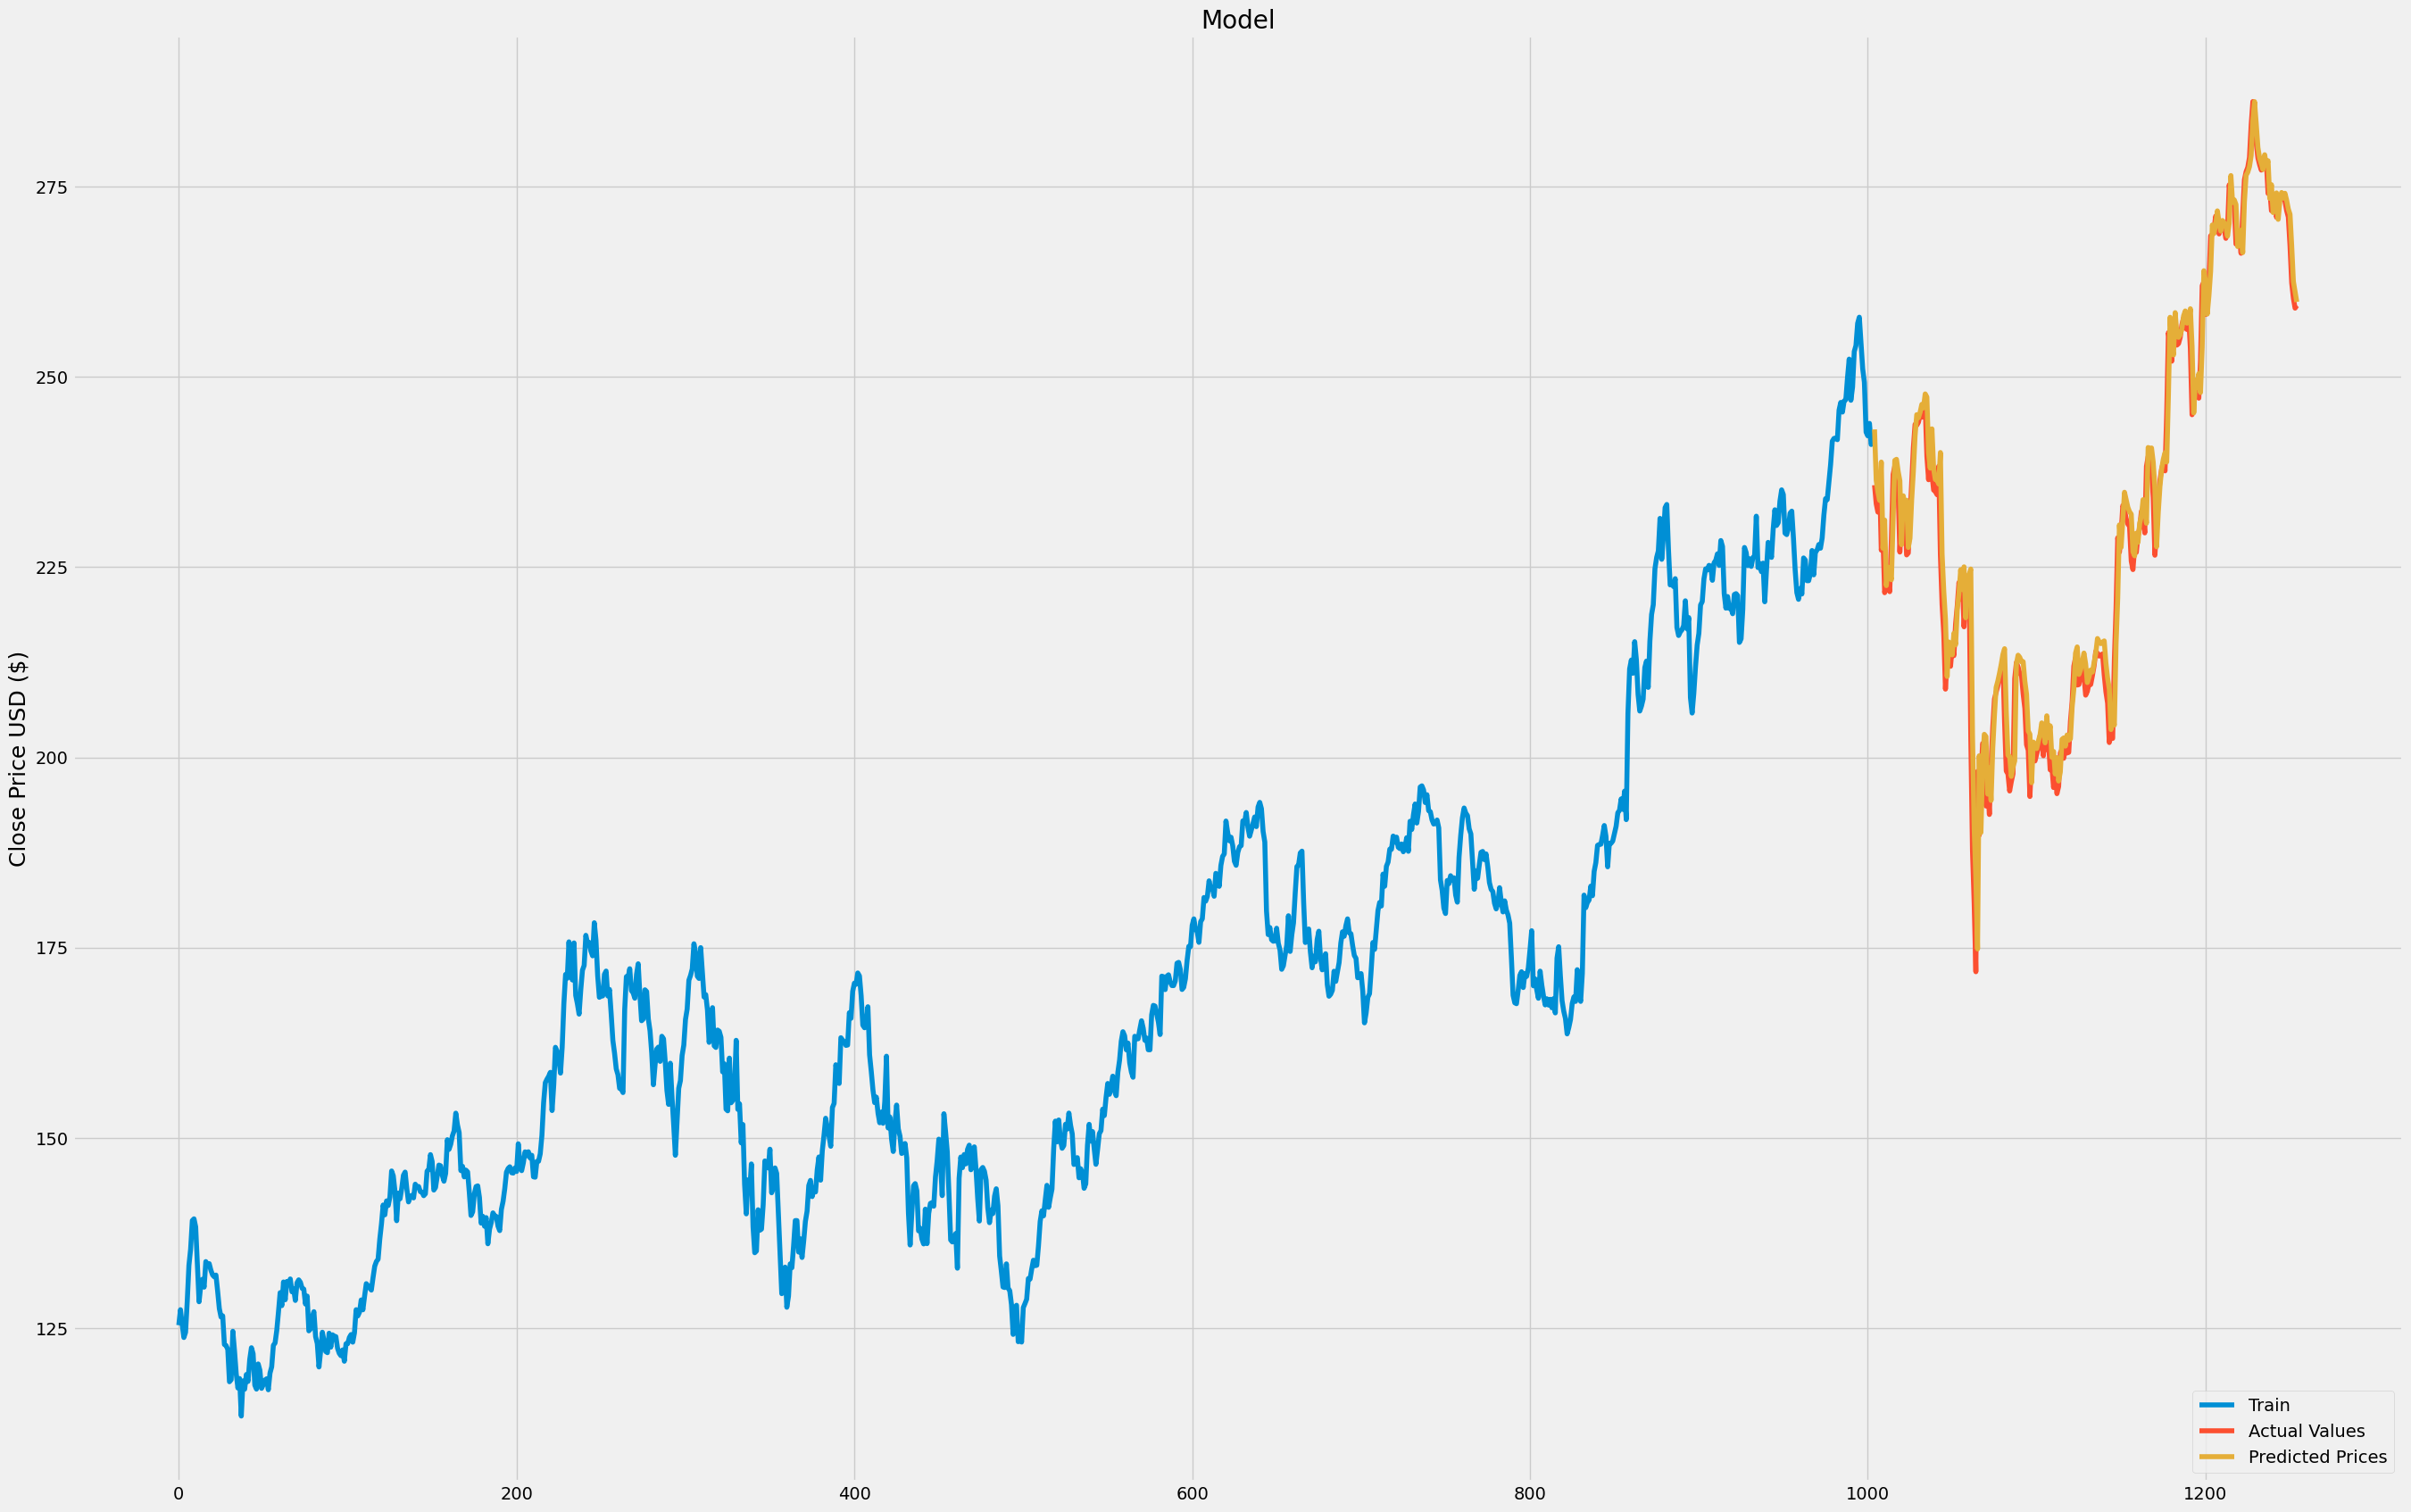

In [46]:
# Plot the data
plt.figure(figsize=(30,20))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ActualPrices['Adj Close'])
plt.plot(PredictedPrices[['Adj Close', 'Predicted Price']])
plt.legend(['Train', 'Actual Values', 'Predicted Prices'], loc='lower right')
plt.show()

In [47]:
PredictedPrices[['Date','Adj Close', 'Predicted Price']].tail(10)

,Date,Adj Close,Predicted Price
1245,26-Dec-25,273.40,274.236603
1246,29-Dec-25,273.76,273.495026
1247,30-Dec-25,273.08,274.134033
1248,31-Dec-25,271.86,273.231720
1249,02-Jan-26,271.01,272.062897
1250,05-Jan-26,267.26,271.369263
1251,06-Jan-26,262.36,267.208710
1252,07-Jan-26,260.33,262.544250
1253,08-Jan-26,259.04,261.192200
1254,09-Jan-26,259.37,259.854370


In [ ]:
# Get the quote
apple_quote = pd.read_csv('Stock_CSV/AAPL.csv')

new_data = apple_quote.filter(['Adj Close'])
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

new_X_test = []
new_X_test.append(last_60_days_scaled)
new_X_test = np.array(new_X_test)
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))

pred_price = model.predict(new_X_test)
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[260.3623]]
